In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.datasets import make_biclusters, make_blobs, make_classification
from sklearn.externals.six import StringIO
from IPython.display import Image  

In [11]:
def graph_classes(x,y):
    fig = plt.figure(figsize=(8,8))
    plt.xlim(x[:,0], 1.5)
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])

In [22]:
x, y = make_blobs(cluster_std=2)

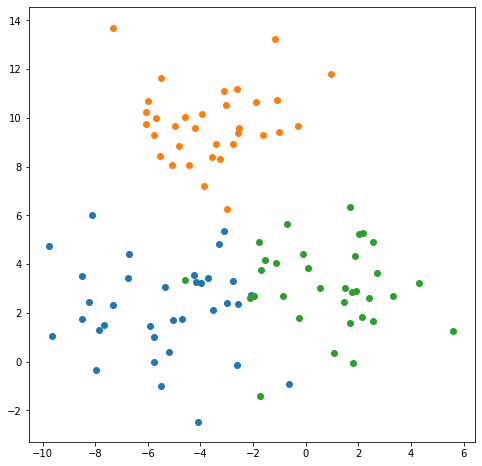

In [23]:
graph_classes(x,y)

In [71]:
tree = DecisionTreeClassifier(max_depth=3,criterion='entropy')
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

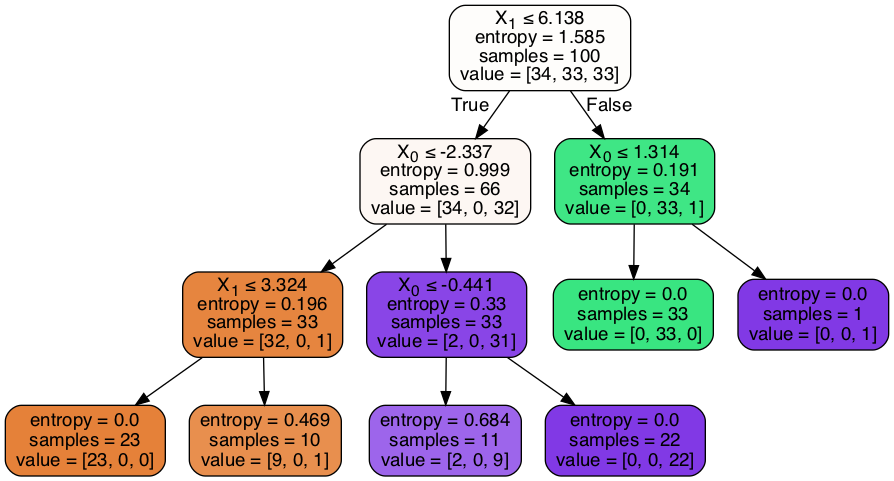

In [56]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

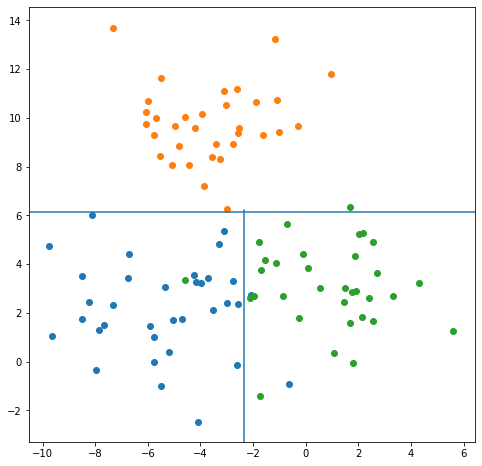

In [54]:
graph_classes(x,y)
plt.axhline(6.138)
plt.axvline(-2.337, ymax=(6.138-y_min)/(y_max-y_min))
#plt.axvline(1.314, ymin = (6.138-y_min)/(y_max-y_min))

In [141]:
tree.tree_.children_right

array([ 8,  5,  4, -1, -1,  7, -1, -1, 10, -1, -1])

In [102]:
tree.tree_.feature

array([ 1,  0,  1, -2, -2,  0, -2, -2,  0, -2, -2])

In [94]:
tree.tree_.threshold

array([ 6.13822365, -2.3369869 ,  3.32442856, -2.        , -2.        ,
       -0.4407704 , -2.        , -2.        ,  1.31409189, -2.        ,
       -2.        ])

In [135]:
def plot_children(tree,node,xmin,xmax,ymin,ymax,xtotal,ytotal,xbase,ybase):
    if tree.tree_.children_left[node] != -1 or tree.tree_.children_right[node] != -1:
        if tree.tree_.feature[node] == 0:
            value = tree.tree_.threshold[node]
            plt.axvline(value,ymax=(ymax-ybase)/ytotal,ymin=(ymin-ybase)/ytotal)
            if tree.tree_.children_left[node] !=-1:
                new_node = tree.tree_.children_left[node]
                plot_children(tree,new_node,xmin,value,ymin,ymax,xtotal,ytotal,xbase,ybase)
            
            if tree.tree_.children_right[node] !=-1:
                new_node = tree.tree_.children_right[node]
                plot_children(tree,new_node,value,xmax,ymin,ymax,xtotal,ytotal,xbase,ybase)
        else:
            value = tree.tree_.threshold[node]
            plt.axhline(value,xmax=(xmax-xbase)/xtotal,xmin=(xmin-xbase)/xtotal)
            if tree.tree_.children_left[node] !=-1:
                new_node = tree.tree_.children_left[node]
                plot_children(tree,new_node,xmin,xmax,ymin,value,xtotal,ytotal,xbase,ybase)
            
            if tree.tree_.children_right[node] !=-1:
                new_node = tree.tree_.children_right[node]
                plot_children(tree,new_node,xmin,xmax,value,ymax,xtotal,ytotal,xbase,ybase)
    pass


In [136]:
def tree_grid_visualizer(x,y,params):
    tree = DecisionTreeClassifier(criterion=params.get('criterion','entropy'),
                                 max_depth=params.get('max_depth',None),
                                 max_leaf_nodes = params.get('max_leaf_nodes',None),
                                 min_samples_leaf=params.get('min_samples_leaf',1))
    tree.fit(x,y)
    xmax = max(x[:,0])+.1
    xmin = min(x[:,0])-.1
    ymax = max(x[:,1])+.1
    ymin = min(x[:,1])-.1
    
    fig = plt.figure(figsize=(8,8))
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])
        
    plot_children(tree,0,xmin,xmax,ymin,ymax,(xmax-xmin),(ymax-ymin),xmin,ymin)
    
    

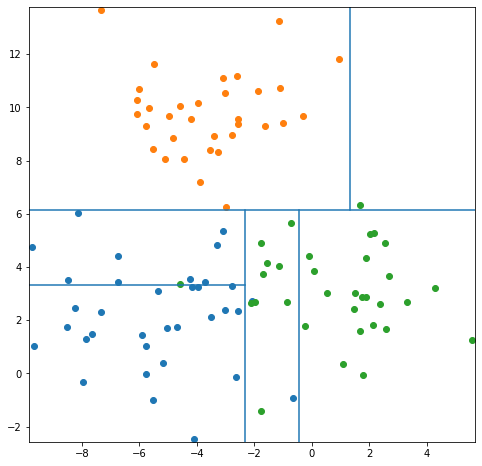

In [140]:
tree_grid_visualizer(x,y,{'max_depth':3})